# DIABETES DATA PROJECT - Wendy Wong

* I chose this dataset as my dad has diabetes and I want to investigate patterns to understand his own hospital admission in and out of emergency for multiple diagnoses, medication and time in hospital


## Data Dictionary:

#### admission_type_id,description
*1=Emergency
*2=Urgent
*3=Elective
*4=Newborn
*5=Not Available
*6=NULL
*7=Trauma Center
*8=Not Mapped

#### admission_source_id,description
*1=Physician Referral,
*2=Clinic Referral,
*3=HMO Referral,
*4=Transfer from a hospital
*5=Transfer from a Skilled Nursing Facility (SNF)
*6=Transfer from another health care facility
*7=Emergency Room
*8=Court/Law Enforcement
*9=Not Available
*10=Transfer from critial access hospital
*11=Normal Delivery
*12=Premature Delivery
*13=Sick Baby
*14=Extramural Birth
*15=Not Available
*17=NULL
*18=Transfer From Another Home Health Agency
*19=Readmission to Same Home Health Agency
*20=Not Mapped
*21=Unknown/Invalid
*22=Transfer from hospital inpt/same fac reslt in a sep claim
*23=Born inside this hospital
*24=Born outside this hospital
*25=Transfer from Ambulatory Surgery Center
*26=Transfer from Hospice

#### Class levels in variables:

*gender: Female =1,Male =0, Unknown/Invalid = 2
* race: ? =0,Caucasian=1,AfricanAmerican = 2,Other = 3,Hispanic =4, Asian =5  
*insulin: Steady=1,Up=2,Down=3
*readmitted: NO = 0,>30=1,<30=2, 
*age: [0-10)=10,[10-20)=20,[20-30)=30,[30-40)=40,[40-50)=50,[50-60)=60,[60-70)=70,[70-80)=80,[80-90)=90,[90-100)=100

### 50 Variables:

*encounter_id                
*patient_nbr                 
*race                       
*gender                      
*age                         
*weight                      
*admission_type_id           
*discharge_disposition_id    
*admission_source_id         
*time_in_hospital            
*payer_code                  
*medical_specialty           
*num_lab_procedures         
*num_procedures              
*num_medications           
*number_outpatient          
*number_emergency           
*number_inpatient            
*diag_1                     
*diag_2                      
*diag_3                      
*number_diagnoses            
*max_glu_serum              
*A1Cresult                  
*metformin                   
*repaglinide                 
*nateglinide                
*chlorpropamide              
*glimepiride                 
*acetohexamide               
*glipizide                 
*glyburide                   
*tolbutamide                 
*pioglitazone              
*rosiglitazone              
*acarbose                    
*miglitol                    
*troglitazone               
*tolazamide                 
*examide                     
*citoglipton                 
*insulin                     
*glyburide-metformin         
*glipizide-metformin        
*glimepiride-pioglitazone    
*metformin-rosiglitazone     
*metformin-pioglitazone      
*change                     
*diabetesMed                 
*readmitted                


# Problem: 

* Research problem: Predict how long people with diabetes get admitted into Emergency section of the hosipital? 
* What are the main reasons for hospital admission is it just for diabetes and another medical condition?
* What characteristics do diabetes patients all have in common, what are the patterns from their health records?


#### Exploratory Questions
* Predict how many people are re-admitted into hospital have diabetes using Logistic regression classification
* Use Unsupervised Learning to  identify patterns and groups of people who have diabetes
* Identify if the reasons for hospital admission for diabetes and another medical condition
* To investigate the predictor variables to identify a person as having Diabetes using Decision Tree and Bagging  as ensemble methods to improve the results of  modelling

## 1 Understanding the data

* Diabetes dataset was sourced from the UCI Machine Learning Repository which includes time-series data:

https://archive.ics.uci.edu/ml/datasets/Diabetes

The data was sourced from two sources electronic recording device and also patient records from 130 US hospitals from 1999 to 2008.

In [7]:
# 1. Import the required libraries and load diabetic dataset
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
! pip install seaborn

In [11]:
# 2.Read diabetic_data.csv into a Dataframe called 'diabetes' 
diabetes = pd.read_table("diabetic_data.csv", sep=',')
diabetes = pd.read_csv("diabetic_data.csv")  
diabetes.head(10)   # inspect the first 10 rows

IOError: File diabetic_data.csv does not exist

In [ ]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

## Data Manipulation 

In [4]:
# Count Categorical variables 

#diabetes.race.value_counts()
#diabetes.gender.value_counts()
#diabetes.diabetesMed.value_counts()
#diabetes.insulin.value_counts()
diabetes.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [5]:
# Locate any missing values 

In [6]:
# 3. Drop columns with missing values 'na'
diabetes.dropna()               

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# Remove any duplicate records  and count how many records
diabetes_no_duplicates = diabetes.drop_duplicates()

In [9]:
# Get the dimensions of the dataframe
diabetes.shape
diabetes_no_duplicates.shape

(101766, 50)

In [10]:
# 4.Examining the data type of the Diabetes data
diabetes_no_duplicates.dtypes            # data types of each column

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### View distibutions of Diabetes dataframe

In [11]:
# scatterplot matrix of numerical variables to view distributions
pd.scatter_matrix(diabetes, figsize=(30,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115258350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12519a310>]], dtype=object)

In [13]:
# Create a New dataframe and get only admission_type_id, diabetesMed,race, gender, age,number_diagnoses,num_procedures, race, num_medications, time_in_hospital,'insulin','readmitted', 'admission_source_id'
diabetes2 = diabetes[['admission_type_id','number_diagnoses','num_procedures','admission_source_id', 'readmitted','diabetesMed','race','gender','age','num_medications','time_in_hospital','insulin']]

In [14]:
# Sort the data by  'admission_type_id' in descending order 
diabetes2.sort('admission_type_id')

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
101765,1,9,3,7,NO,No,Caucasian,Male,[70-80),3,6,No
47863,1,9,1,7,NO,Yes,Caucasian,Female,[80-90),30,10,No
47864,1,9,0,7,>30,Yes,Caucasian,Male,[80-90),12,4,No
47865,1,4,0,7,>30,Yes,Caucasian,Female,[70-80),22,9,Down
47866,1,3,1,7,NO,Yes,AfricanAmerican,Female,[10-20),13,3,Down
47867,1,6,5,7,>30,No,Caucasian,Female,[40-50),13,2,No
47869,1,5,2,7,NO,Yes,AfricanAmerican,Female,[50-60),23,4,Steady
47871,1,4,0,7,>30,Yes,AfricanAmerican,Female,[40-50),15,1,Up
85850,1,8,3,7,NO,No,Caucasian,Male,[50-60),11,2,No
47876,1,5,0,1,<30,Yes,Caucasian,Female,[80-90),14,1,Down


In [15]:
# filter DataFrame to only include admission_type_id (emergency=1) with diabetes medication= Yes

diabetes2[diabetes2.admission_type_id.isin([1])] 
diabetes2[(diabetes2.admission_type_id==1)].diabetesMed.value_counts() 

Yes    41266
No     12724
Name: diabetesMed, dtype: int64

In [16]:
# Drop variables that are useful for the 
diabetesdrop = diabetes.drop(['number_emergency','diag_1','diag_2','diag_3','max_glu_serum','number_inpatient','number_outpatient','num_lab_procedures','encounter_id','rosiglitazone','glyburide','glipizide','glimepiride','metformin','repaglinide','A1Cresult','glyburide-metformin','discharge_disposition_id','nateglinide','acarbose','chlorpropamide','acetohexamide','glimepiride-pioglitazone','tolbutamide','glipizide-metformin','metformin-pioglitazone','metformin-rosiglitazone','pioglitazone','change','weight','citoglipton','payer_code','medical_specialty','miglitol','troglitazone','examide','tolazamide'],axis=1)
#print diabetesdrop

 ## Transforming multi-class and categorical variables

In [17]:
# Replace Values by applying hierarchies e.g. No =0 and Yes =1 and provide values for indicator variables
diabetes3 = diabetes2.replace({'Unknown/Invalid': 2,'>7':1,'>8':2,'Norm':3,'None':0,'No':0,'Yes':1,'NO':0,'Female':1,'Male':0,'Caucasian':1,'?':0,'AfricanAmerican':2,'Other':3,'Hispanic':4,'Asian':5, 'Steady':1,'Up':2,'Down':3,'>30':1,'<30':2,'[0-10)':10,'[10-20)':20,'[20-30)':30,'[30-40)':40,'[40-50)':50,'[50-60)':60,'[60-70)':70,'[70-80)':80,'[80-90)':90,'[90-100)':100})

# Discretization and Binning the column 'age'
ages = [10,20,30,40,50,60,70,80,90,100]
bins = [0,10,20,30,40,50,60,70,80,90,100]
cats = pd.cut(ages,bins)
cats

[(0, 10], (10, 20], (20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, 100]]
Categories (10, object): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

# Exploratory Data Analysis

In [18]:
# Check any transformed variables that have missing values
diabetes3.isnull()

#Check transformed variables are converted into integers as SciKit learn can only compute on variables that are continuous
diabetes3

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
0,6,1,0,1,0,0,1,1,10,1,1,0
1,1,9,0,7,1,1,1,1,20,18,3,2
2,1,6,5,7,0,1,2,1,30,13,2,0
3,1,7,1,7,0,1,1,0,40,16,2,2
4,1,5,0,7,0,1,1,0,50,8,1,1
5,2,9,6,2,1,1,1,0,60,16,3,1
6,3,7,1,2,0,1,1,0,70,21,4,1
7,1,8,0,7,1,1,1,0,80,12,5,0
8,2,8,2,4,0,1,1,1,90,28,13,1
9,3,8,3,4,0,1,1,1,100,18,12,1


In [19]:
# Summarise the data
diabetes3.describe()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,7.422607,1.339730,5.754437,0.572480,0.770031,1.281273,0.537645,70.967022,16.021844,4.395987,0.885708
std,1.445403,1.933600,1.705807,4.064081,0.684068,0.420815,0.687107,0.498642,15.940838,8.127566,2.985108,1.021758
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,60.000000,10.000000,2.000000,0.000000
50%,1.000000,8.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,70.000000,15.000000,4.000000,1.000000
75%,3.000000,9.000000,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,80.000000,20.000000,6.000000,1.000000
max,8.000000,16.000000,6.000000,25.000000,2.000000,1.000000,5.000000,2.000000,100.000000,81.000000,14.000000,3.000000


In [20]:
# Select only the observations with admission_type_id = 1 (i.e.emergency admission)
diabetes3[(diabetes3['admission_type_id']==1)]

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
1,1,9,0,7,1,1,1,1,20,18,3,2
2,1,6,5,7,0,1,2,1,30,13,2,0
3,1,7,1,7,0,1,1,0,40,16,2,2
4,1,5,0,7,0,1,1,0,50,8,1,1
7,1,8,0,7,1,1,1,0,80,12,5,0
10,1,9,2,7,1,1,2,1,50,17,9,1
12,1,8,0,7,2,1,1,1,50,15,7,3
13,1,8,1,7,0,1,1,0,90,31,10,1
15,1,9,5,7,0,1,2,0,70,13,12,2
16,1,8,4,7,2,1,2,0,60,17,4,1


In [21]:
# group the data by patients with 'diabetesMed'
bypatient = diabetes3.groupby('diabetesMed')
bypatient.describe()

admission_source_id  admission_type_id           age  \
diabetesMed                                                               
0           count         23403.000000       23403.000000  23403.000000   
            mean              5.743281           2.024826     71.626287   
            std               4.027094           1.477064     16.024807   
            min               1.000000           1.000000     10.000000   
            25%               1.000000           1.000000     60.000000   
            50%               7.000000           1.000000     70.000000   
            75%               7.000000           3.000000     80.000000   
            max              20.000000           8.000000    100.000000   
1           count         78363.000000       78363.000000  78363.000000   
            mean              5.757768           2.023761     70.770134   
            std               4.075081           1.435821     15.910481   
            min               1.000000           1.000000     10.000000   
            25%               1.000000           1.000000     60.000000   
            50%               7.000000           1.000000     70.000000   
            75%               7.000000           3.000000     80.000000   
            max              25.000000           8.000000    100.000000   

                         gender       insulin  num_medications  \
diabetesMed                                                      
0           count  23403.000000  23403.000000     23403.000000   
            mean       0.552194      0.000000        13.242063   
            std        0.497365      0.000000         7.030729   
            min        0.000000      0.000000         1.000000   
            25%        0.000000      0.000000         8.000000   
            50%        1.000000      0.000000        12.000000   
            75%        1.000000      0.000000        17.000000   
            max        2.000000      0.000000        69.000000   
1           count  78363.000000  78363.000000     78363.000000   
            mean       0.533300      1.150224        16.852022   
            std        0.498944      1.025439         8.247816   
            min        0.000000      0.000000         1.000000   
            25%        0.000000      0.000000        11.000000   
            50%        1.000000      1.000000        15.000000   
            75%        1.000000      2.000000        21.000000   
            max        2.000000      3.000000        81.000000   

                   num_procedures  number_diagnoses          race  \
diabetesMed                                                         
0           count    23403.000000      23403.000000  23403.000000   
            mean         1.361022          7.347648      1.286630   
            std          1.672721          1.935411      0.687879   
            min          0.000000          1.000000      0.000000   
            25%          0.000000          6.000000      1.000000   
            50%          1.000000          8.000000      1.000000   
            75%          2.000000          9.000000      1.000000   
            max          6.000000         16.000000      5.000000   
1           count    78363.000000      78363.000000  78363.000000   
            mean         1.333372          7.444993      1.279673   
            std          1.715523          1.932508      0.686872   
            min          0.000000          1.000000      0.000000   
            25%          0.000000          6.000000      1.000000   
            50%          1.000000          8.000000      1.000000   
            75%          2.000000          9.000000      1.000000   
            max          6.000000         16.000000      5.000000   

                     readmitted  time_in_hospital  
diabetesMed                                        
0           count  23403.000000      23403.000000  
            mean       0.500748          4.054480  
            std        0.664

## Exploratory Questions:

In [23]:
# We can also aggregate by group 
bypatient['race'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,1.286630,0.687879
1,78363,1.279673,0.686872


In [24]:
# We can also aggregate by group 
bypatient['gender'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,0.552194,0.497365
1,78363,0.533300,0.498944


In [25]:
# Inspect the values for the variable'gender'
#diabetes3['gender']

In [26]:
# We can also aggregate by group 
bypatient['age'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,71.626287,16.024807
1,78363,70.770134,15.910481


In [27]:
# We can also aggregate by group 
bypatient['admission_type_id'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,2.024826,1.477064
1,78363,2.023761,1.435821


In [28]:
bypatient['time_in_hospital'].mean()

diabetesMed
0    4.054480
1    4.497977
Name: time_in_hospital, dtype: float64

In [29]:
# We can also aggregate by group 
bypatient['num_medications'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,13.242063,7.030729
1,78363,16.852022,8.247816


In [30]:
bypatient['num_procedures'].mean()

diabetesMed
0    1.361022
1    1.333372
Name: num_procedures, dtype: float64

In [31]:
bypatient['readmitted'].count()

diabetesMed
0    23403
1    78363
Name: readmitted, dtype: int64

In [32]:
# We can also aggregate by group 
bypatient['number_diagnoses'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,7.347648,1.935411
1,78363,7.444993,1.932508


In [33]:
# We can also aggregate by group 
bypatient['race'].agg([len, np.mean, np.std])

,len,mean,std
diabetesMed,,,
0,23403,1.286630,0.687879
1,78363,1.279673,0.686872


## Visualising the data in Python

In [34]:
# Display the plots in the notebook with the following command
%matplotlib inline
# Import the graphing libraries we will use
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

In [35]:
import seaborn as sns
sns.set(color_codes=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140672910>]], dtype=object)

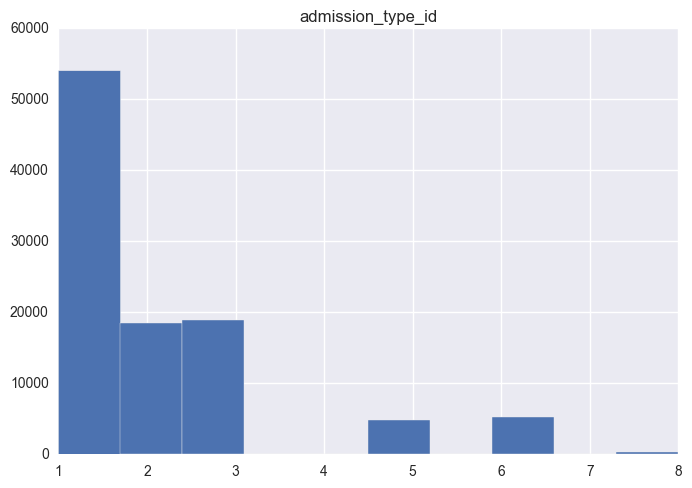

In [36]:
diabetes3[['admission_type_id']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1406cf650>]], dtype=object)

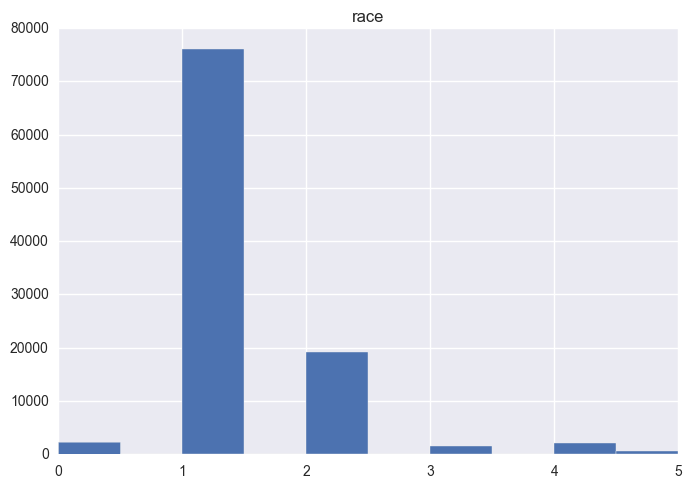

In [37]:
diabetes3[['race']].hist()

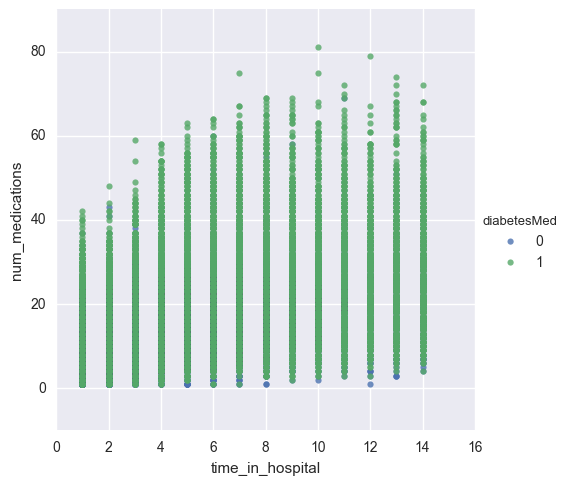

In [38]:
# Draw a Scatterplot showing diabetesMed and admission_type_id
sns.lmplot(x='time_in_hospital', y= "num_medications", hue="diabetesMed", data=diabetes3, fit_reg=False)

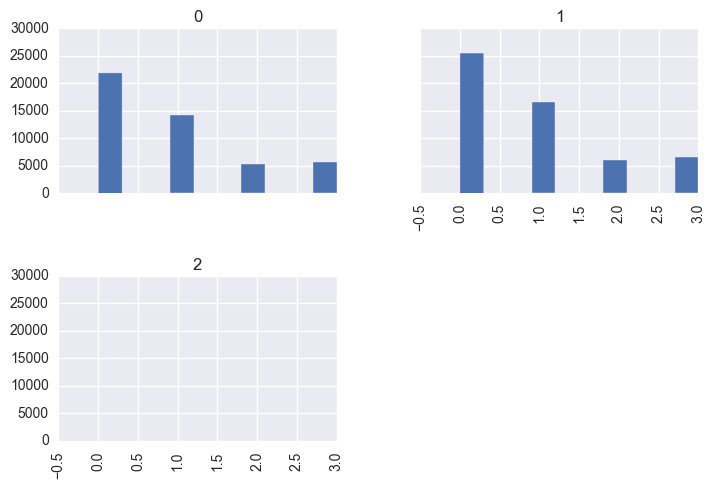

In [39]:
# grouped histogram of insulin (shows distribution for each group)

diabetes3.insulin.hist(by=diabetes3.gender, sharex=True,sharey=True)
plt.xlabel('insulin')

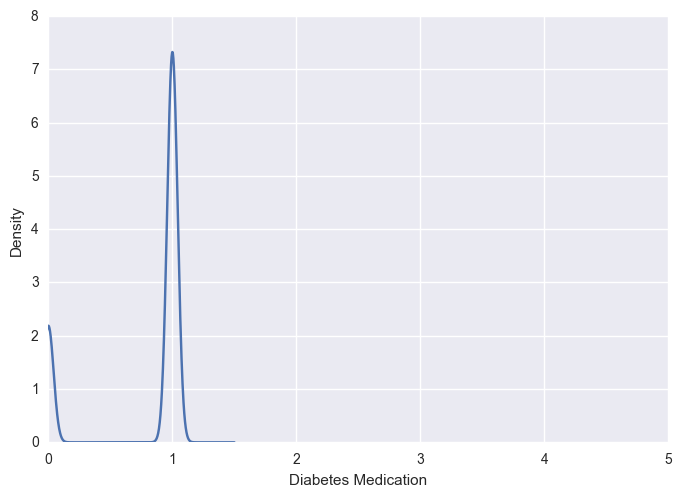

In [40]:
# density plot of diabetesMed
diabetes3.diabetesMed.plot(kind='density',xlim=(0,5))
plt.xlabel('Diabetes Medication')

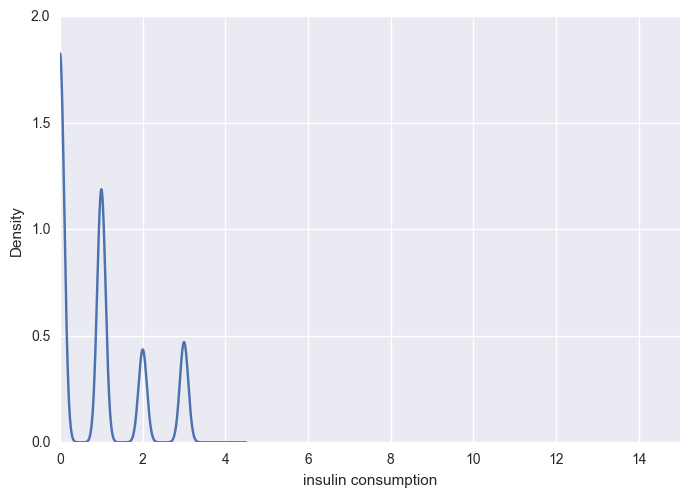

In [41]:
# density plot of insulin
diabetes3.insulin.plot(kind='density',xlim=(0,15))
plt.xlabel('insulin consumption')

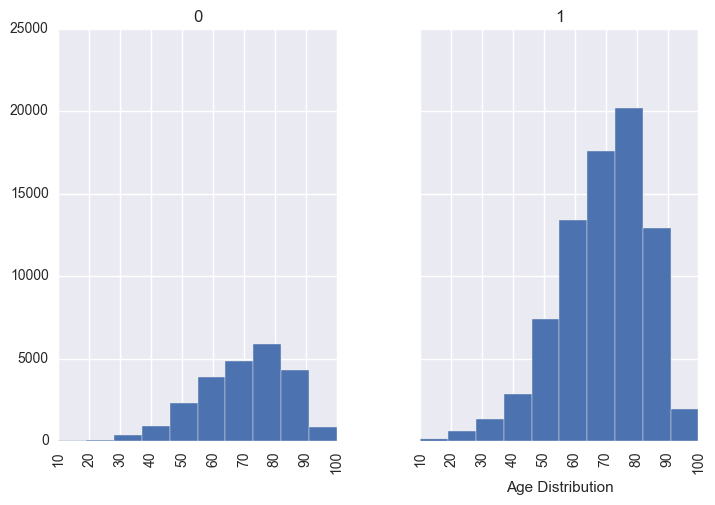

In [42]:
# grouped histogram of diabetesMed(shows distribution for each group)

diabetes3.age.hist(by=diabetes3.diabetesMed, sharex=True,sharey=True)
plt.xlabel('Age Distribution')
plt.ylabel('Diabetes Medication')

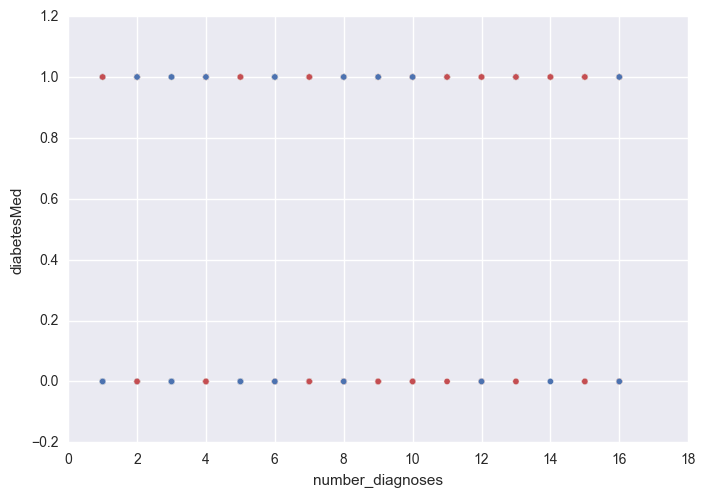

In [43]:
# scatterplot of race vs diabetesMed into emergency admission type into hospital. Emergency admissions are in red 
colors = np.where(diabetes3.admission_type_id==1,'r','b')
diabetes3.plot(kind='scatter', x='number_diagnoses',y='diabetesMed', c=colors)

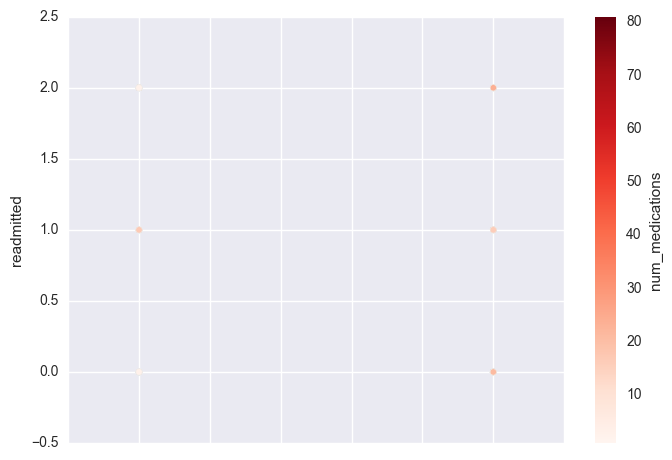

In [44]:
# scatterplot where colour varies according to 'number of medications'
diabetes3.plot(kind='scatter', x='diabetesMed',y='readmitted', c='num_medications',colormap='Reds')

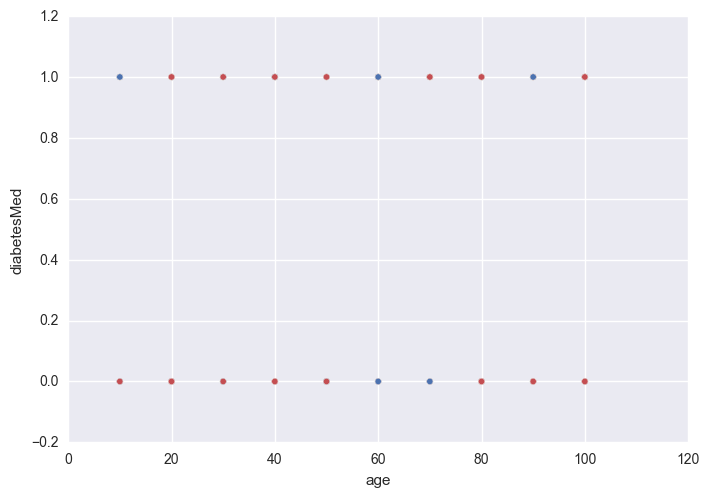

In [45]:
# scatterplot of insulin vs emergency admission type into hospital. Emergency admissions are in red 
colors = np.where(diabetes3.admission_type_id==1,'r','b')
diabetes3.plot(kind='scatter', x='age',y='diabetesMed', c=colors)

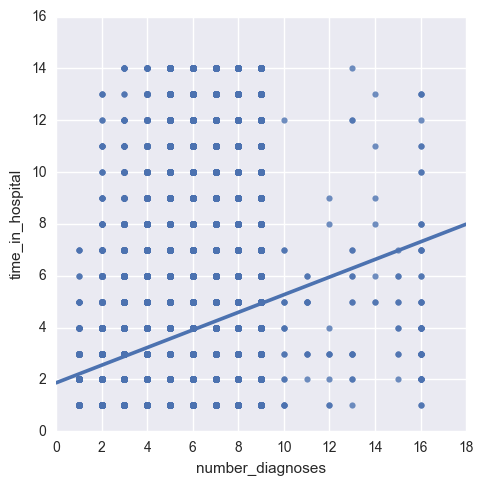

In [46]:
sns.lmplot(x='number_diagnoses', y='time_in_hospital', data=diabetes3, ci=None)

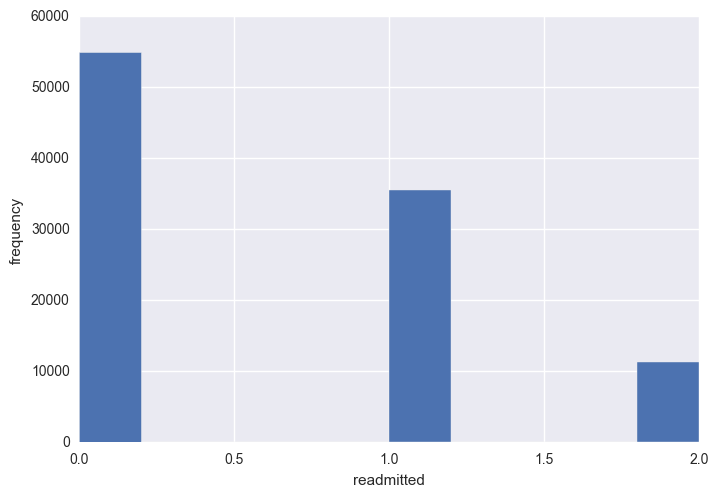

In [47]:
# plot of 'readmitted' to check the distribution
diabetes3.readmitted.hist(bins=10)
plt.xlabel('readmitted')
plt.ylabel('frequency')

In [48]:
#Print count of selected numerical variables

print diabetes3.time_in_hospital.value_counts()
print diabetes3.number_diagnoses.value_counts() 
print diabetes3.admission_source_id.value_counts()
print diabetes3.admission_type_id.value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64
9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


# 1 Linear regression

In [49]:
# 1. Import the required libraries
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import datasets
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [50]:
from sklearn import datasets
import matplotlib.cm as cm
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
import pandas as pd

In [51]:
#summarize data
diabetes3.describe()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,7.422607,1.339730,5.754437,0.572480,0.770031,1.281273,0.537645,70.967022,16.021844,4.395987,0.885708
std,1.445403,1.933600,1.705807,4.064081,0.684068,0.420815,0.687107,0.498642,15.940838,8.127566,2.985108,1.021758
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,60.000000,10.000000,2.000000,0.000000
50%,1.000000,8.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,70.000000,15.000000,4.000000,1.000000
75%,3.000000,9.000000,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,80.000000,20.000000,6.000000,1.000000
max,8.000000,16.000000,6.000000,25.000000,2.000000,1.000000,5.000000,2.000000,100.000000,81.000000,14.000000,3.000000


In [52]:
diabetes3.shape

(101766, 12)

In [53]:
# check correlation between variables 

diabetes3.corr()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
admission_type_id,1.000000,-0.117126,0.129888,0.106654,-0.008950,-0.000310,-0.029655,-0.014636,-0.007209,0.079535,-0.012500,-0.012368
number_diagnoses,-0.117126,1.000000,0.073734,0.072114,0.104820,0.021186,-0.067267,0.003277,0.242597,0.261526,0.220186,0.094976
num_procedures,0.129888,0.073734,1.000000,-0.135400,-0.038235,-0.006821,-0.022657,-0.059843,-0.030104,0.385767,0.191472,0.014548
admission_source_id,0.106654,0.072114,-0.135400,1.000000,0.031816,0.001500,0.001105,0.003810,0.044696,-0.054533,-0.006965,0.025351
readmitted,-0.008950,0.104820,-0.038235,0.031816,1.000000,0.057306,-0.010927,0.014385,0.030271,0.051772,0.057718,0.067420
diabetesMed,-0.000310,0.021186,-0.006821,0.001500,0.057306,1.000000,-0.004261,-0.015945,-0.022601,0.186910,0.062520,0.473723
race,-0.029655,-0.067267,-0.022657,0.001105,-0.010927,-0.004261,1.000000,0.035835,-0.139678,-0.059398,-0.005072,0.028056
gender,-0.014636,0.003277,-0.059843,0.003810,0.014385,-0.015945,0.035835,1.000000,0.050600,0.022030,0.029866,-0.001035
age,-0.007209,0.242597,-0.030104,0.044696,0.030271,-0.022601,-0.139678,0.050600,1.000000,0.041847,0.107515,-0.097660
num_medications,0.079535,0.261526,0.385767,-0.054533,0.051772,0.186910,-0.059398,0.022030,0.041847,1.000000,0.466135,0.236652


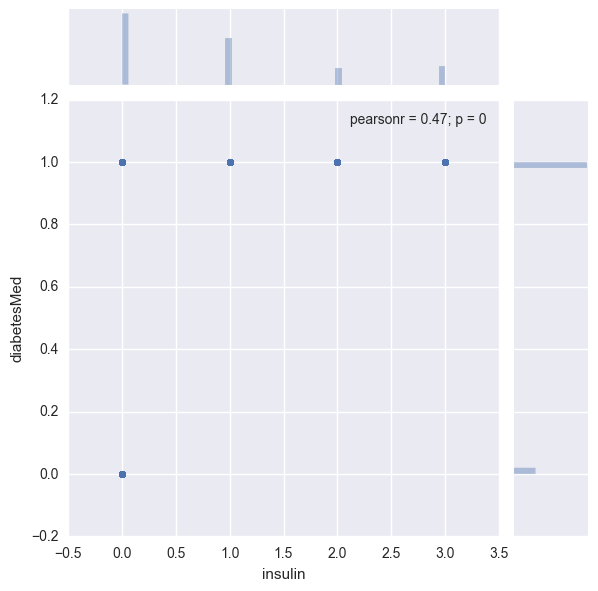

In [54]:
sns.jointplot(x="insulin", y="diabetesMed", data=diabetes3);

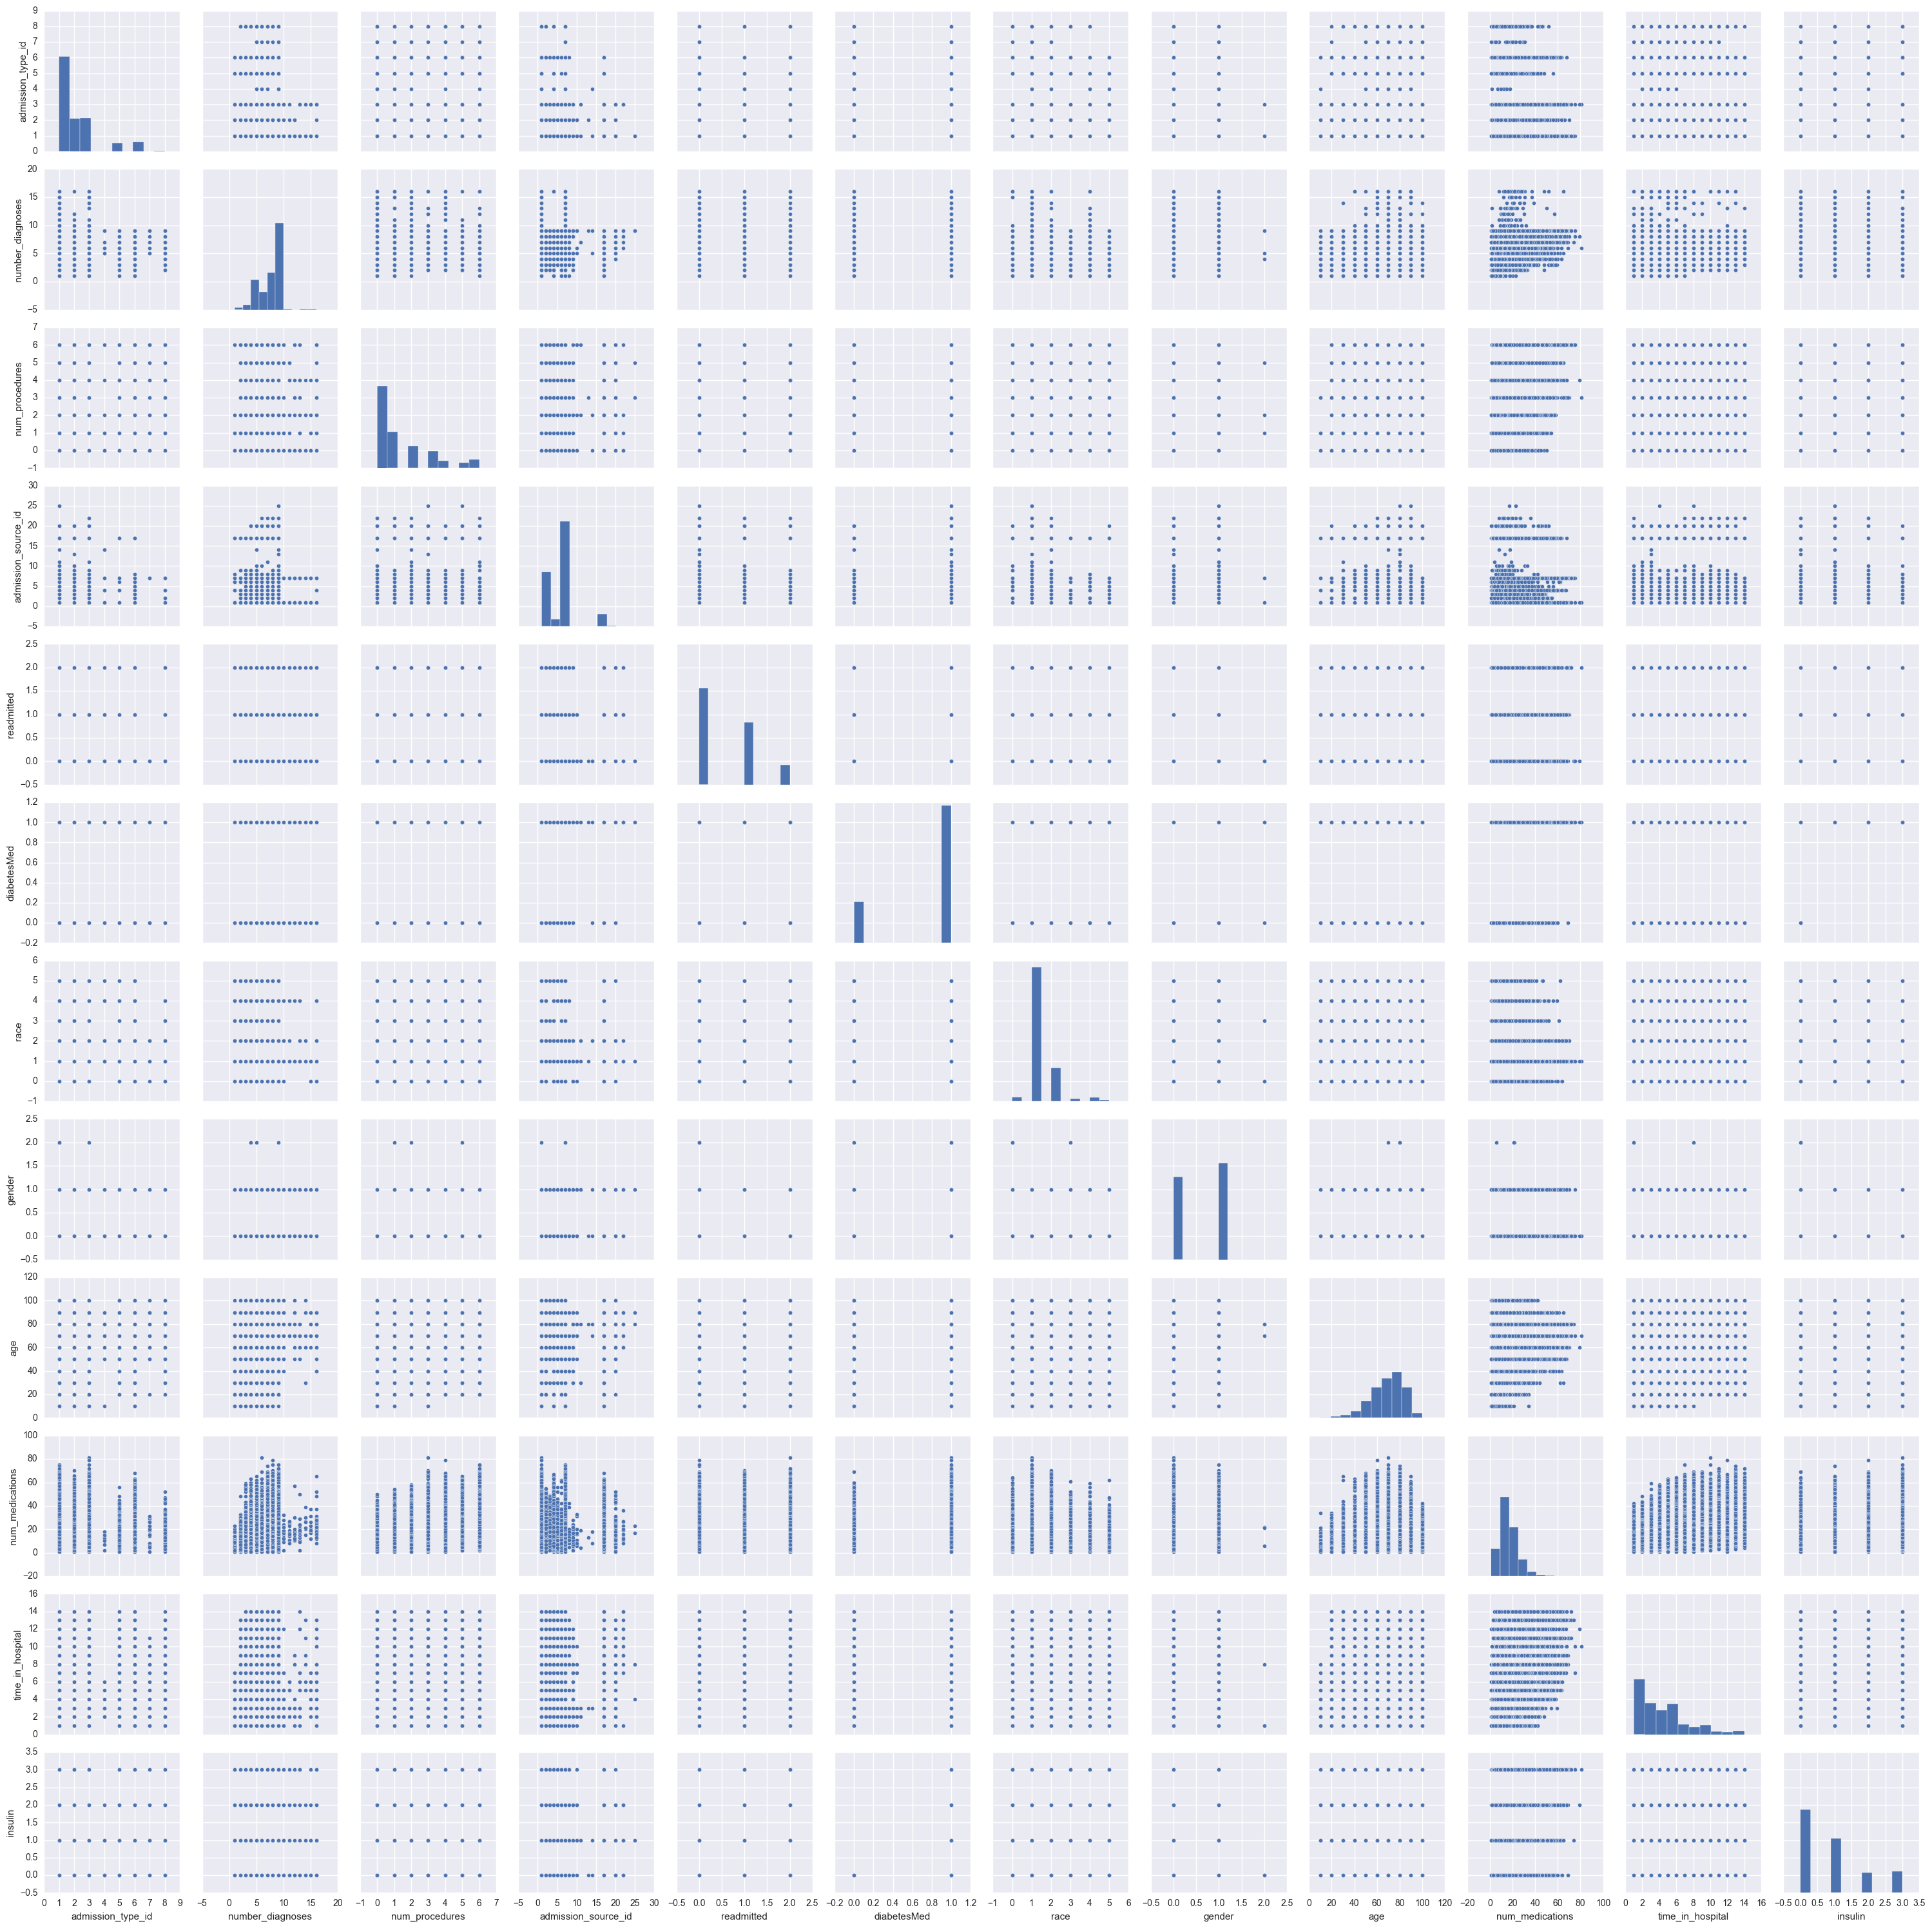

In [55]:
# Plot the data to view distributions 

sns.pairplot(diabetes3);

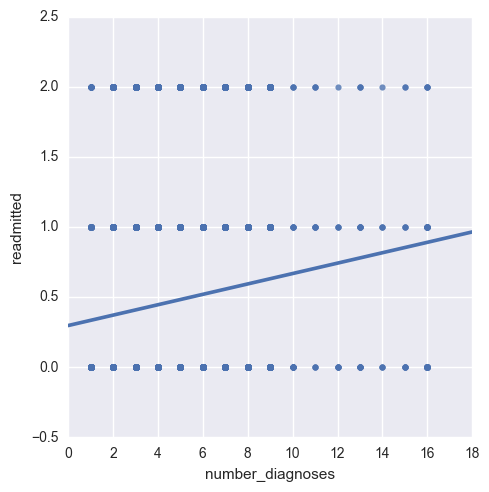

In [56]:
sns.lmplot(x='number_diagnoses', y='readmitted', data=diabetes3, ci=None)

In [57]:
diabetes3.head()

,admission_type_id,number_diagnoses,num_procedures,admission_source_id,readmitted,diabetesMed,race,gender,age,num_medications,time_in_hospital,insulin
0,6,1,0,1,0,0,1,1,10,1,1,0
1,1,9,0,7,1,1,1,1,20,18,3,2
2,1,6,5,7,0,1,2,1,30,13,2,0
3,1,7,1,7,0,1,1,0,40,16,2,2
4,1,5,0,7,0,1,1,0,50,8,1,1


In [58]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['diabetesMed']
X = diabetes3[feature_cols]
y = diabetes3.readmitted
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# create a fitted model in one line using Ordinary Least Squares
lm = smf.ols(formula='readmitted ~ diabetesMed' , data=diabetes3).fit()

# print the coefficients
lm.params

Intercept      0.500748
diabetesMed    0.093155
dtype: float64

In [60]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             readmitted   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     335.3
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           8.95e-75
Time:                        17:52:14   Log-Likelihood:            -1.0559e+05
No. Observations:              101766   AIC:                         2.112e+05
Df Residuals:                  101764   BIC:                         2.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.5007      0.004    112.168      0.000         0.492     0.509
diabetesMed     0.0932      0.005     18.311      0.000         0.083     0.103
==============================================================================
Omnibus:                    10809.731   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11690.094
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                       2.446   Cond. No.                         3.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Try fitting a model with two independent and one dependent variable
# create a fitted model in one line
lm = smf.ols(formula='readmitted ~ diabetesMed + number_diagnoses', data=diabetes3).fit()

# print the coefficients
lm.params

Intercept           0.231310
diabetesMed         0.089585
number_diagnoses    0.036670
dtype: float64

####  Interpretation of coefficients: 

1.A 1 unit increase in 'number_of_diagnoses' is associated with a 0.036670 unit increase in 'readmitted'with all other parameters being equal in the model.

2.A 1 unit increase in 'diabetesMed' is associated with a 0.089585 unit increase in 'readmitted' with all things being equal in the model

In [62]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             readmitted   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     723.7
Date:                Mon, 05 Dec 2016   Prob (F-statistic):          8.63e-313
Time:                        17:52:23   Log-Likelihood:            -1.0504e+05
No. Observations:              101766   AIC:                         2.101e+05
Df Residuals:                  101763   BIC:                         2.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.2313      0.009     25.057      0.000         0.213     0.249
diabetesMed          0.0896      0.005     17.701      0.000         0.080     0.100
number_diagnoses     0.0367      0.001     33.292      0.000         0.035     0.039
==============================================================================
Omnibus:                    10280.286   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11424.382
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       2.483   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Explain coefficients -Muliple Linear regression

To predict the target y = 'readmitted',by increasing the number of independent variables to 2, the R-squared represented by:

#### 1.4%  indicates that the model is explained by two variables
and hence is a poor model with minimal explanatory power. And the variables'number_diagnoses' and 'diabetesMed' with p-value= 0.000 which was less than <0.05 was statistically significant.

'number_diagnoses' and 'readmitted' were not highly correlated variables with a pearson coefficient of 0.10 which is a weak positive relationship since the value was between -1 and 1.

In [63]:
# create a DataFrame with the minimum and maximum values of number_diagnoses
X_new = pd.DataFrame({'diabetesMed': [diabetes3.diabetesMed.min(), diabetes3.diabetesMed.max()]})
X_new.head()

,diabetesMed
0,0
1,1


In [64]:
# inspect data types for linear prediction

#diabetes3.dtypes

In [65]:
# Cannot make a prediction since the response is a qualitative variable.

#preds = lm.predict(X_new)
#preds

In [66]:
# compute prediction for diabetesMed=1 using the equation
linreg.intercept_ + linreg.coef_ * 0

array([ 0.50074777])

### Linear regression equation: y=β0+β1x

In [68]:
# compute prediction for number_diagnoses=1 using the predict method
linreg.predict(0)

array([ 0.50074777])

In [67]:
# increasing diabetesMed by 0 (so that number_diagnoses=1) increase readmitted by 0.037139327
# compute prediction for number_diagnoses=3 using the predict method
linreg.predict(1)

array([ 0.59390273])

In [68]:
# linreg
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(0)
print linreg.predict(1)

[ 0.50074777]
[ 0.59390273]


## Linear regression -  predicting categorical response

In [69]:
diabetes3
diabetes['assorted'] = diabetes3.readmitted.map({'>30':1,'<30':2, 'NO':0})

In [70]:
#  1. Define diabetesMed,number_diagnoses as the features and readmitted as the response

# fit a linear regression model and store the predictions
feature_cols = ['number_diagnoses']
X = diabetes3[feature_cols]
y = diabetes3.readmitted

linreg.fit(X, y)
y_pred = linreg.predict(X)

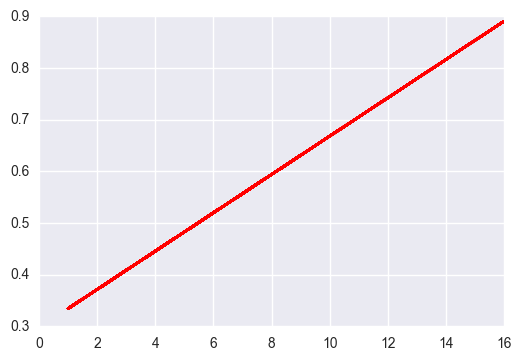

In [71]:
# Linear regression

# or you could make predictions for all values of X, and then plot those predictions connected by a line
y_pred = linreg.predict(X)
plt.plot(diabetes3.number_diagnoses, y_pred, color='red')

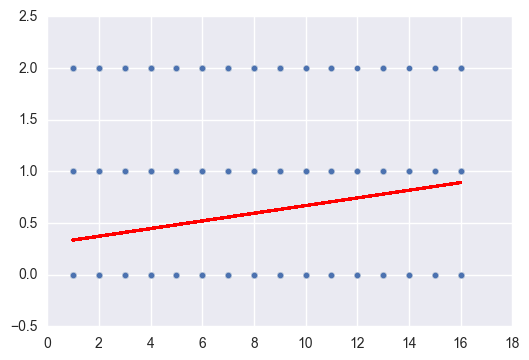

In [72]:
# scatter plot that includes the regression line
plt.scatter(diabetes3.number_diagnoses, diabetes3.readmitted)
plt.plot(diabetes3.number_diagnoses, y_pred, color='red')

In [73]:
# examine the predictions
y_pred[:10]

array([ 0.33431023,  0.63097454,  0.51972542,  0.55680846,  0.48264238,
        0.63097454,  0.55680846,  0.5938915 ,  0.5938915 ,  0.5938915 ])

In [74]:
# transform predictions to 1 or 0
y_pred_class = np.where(y_pred >= 0.3, 1, 0)
y_pred_class

array([1, 1, 1, ..., 1, 1, 1])

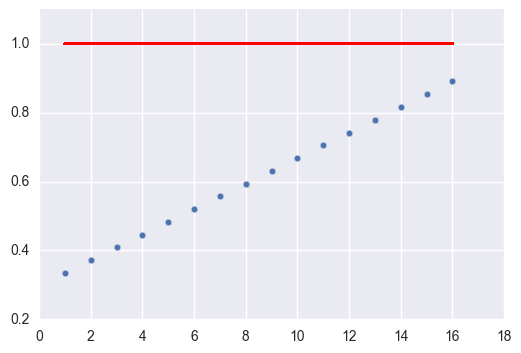

In [75]:
# plot the class predictions
plt.scatter(diabetes3.number_diagnoses, y_pred)
plt.plot(diabetes3.number_diagnoses, y_pred_class, color='red')

In [76]:
# add predicted class to DataFrame
diabetes3['y_pred_class'] = y_pred_class

# sort DataFrame by number_diagnoses
diabetes3.sort_values(by='number_diagnoses', inplace=True)

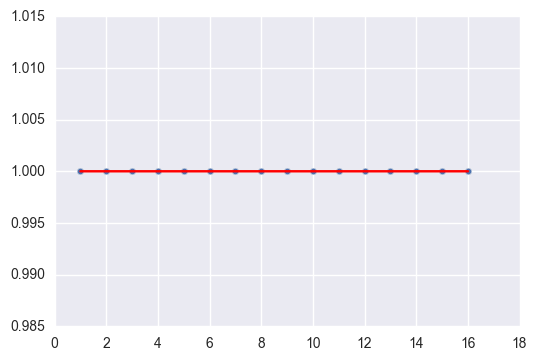

In [77]:
# plot the class predictions again
plt.scatter(diabetes3.number_diagnoses, y_pred_class)
plt.plot(diabetes3.number_diagnoses, diabetes3.y_pred_class, color='red')

# 2 Classification 
### Multinomial Logistic regression - predict a categorical response - 2 features

In [78]:
# 1. define Dnumber_diagnoses as the feature and readmitted as the response
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['number_diagnoses']
X = diabetes3[feature_cols]
y = diabetes3.readmitted 

logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [79]:
# 2. Split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [80]:
# 3. Fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('number_diagnoses', -0.11987400695469405)]

In [81]:
# 4. Make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.538361764012


In [82]:
# 5. Add gender as an extra feature and calculate testing accuracy
diabetes3.gender.fillna(diabetes3.gender.mean(), inplace=True)
feature_cols = ['number_diagnoses','gender']
X = diabetes3[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.538322458926


In [83]:
# Count  classes of 'readmitted' . No =0, >30 = 1,<30= 2
diabetes3.readmitted.value_counts()

0    54864
1    35545
2    11357
Name: readmitted, dtype: int64

In [84]:
# 7. Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y_test, y_pred_class)

[[13691    12     0]
 [ 8857     5     0]
 [ 2873     4     0]]


### Interpretation of the Confusion Matrix

* The Confusion Matrix(classifier) was used to test  hospital mergency readmission based on patients 'number_diagnoses' and 'gender'

* How many classes are there? For re-admissions there were three possible predicted classes 'No'=0, '<30'=2, and'>30'=1
* How many  readmitted patients were there? Class 0 = 13703 patients(not readmitted), Class 1= 8860 patients and class 2 = 2859 patients 
* How many times is Readmission predicted for Class 1 = >30: 4 times
* How many times is Readmission predicted for Class 2 = <30: 5 times


1. Sensitivity or Recall (True Positive rate) = Number of true positives/Number of True Positives + Number of False Negatives

*Recall = TP/TN+ FN= 0/5= 0%


2. Specificity or Precision = Number of true negative /Number of true negatives +  Number of  false positives

* Specificity = TN/TN + FP =4/4+0 = 1 =100%

3. Accuracy (ACC) = Sum of TP + Sum of TN/ Sum of Popn = 4+ 0/21= 0.190476
#### or model accuracy 19.04%

### Multiple Logistic regression - with 3 features

In [85]:
# using statsmodel for multi -logit model
import statsmodels.api as sm
mlogit_mod = sm.MNLogit(y_train, X_train)
mlogit_res = mlogit_mod.fit()
print(mlogit_res.summary())
print mlogit_res.params

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleDeprecationWarning: using a non-integer number instead of an integer 

Optimization terminated successfully.
         Current function value: 0.961709
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:             readmitted   No. Observations:                76324
Model:                        MNLogit   Df Residuals:                    76320
Method:                           MLE   Df Model:                            2
Date:                Mon, 05 Dec 2016   Pseudo R-squ.:                -0.01816
Time:                        17:54:21   Log-Likelihood:                -73401.
converged:                       True   LL-Null:                       -72092.
                                        LLR p-value:                     1.000
    readmitted=1       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
number_diagnoses    -0.0410      0.001    -28.239      0.000        -0.044    -0.038
gender     

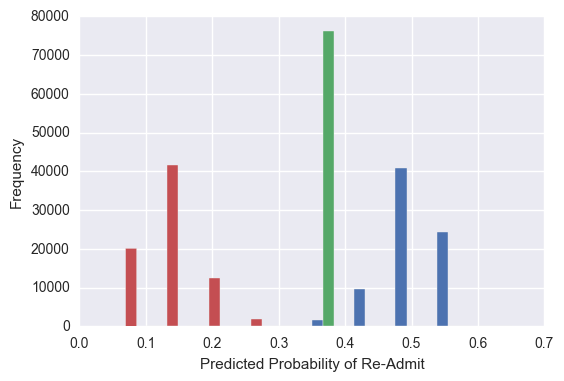

In [86]:
# make predictions on testing set
y_pred_class = mlogit_res.predict(X_train)
plt.hist(y_pred_class)
plt.xlabel('Predicted Probability of Re-Admit')
plt.ylabel('Frequency')
plt.show()

##  Logistic regression - One feature

In [87]:
# 5. Logistic regression on one feature

# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['diabetesMed']
X = diabetes3[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('diabetesMed', -0.28767748741821181)]

In [88]:
# make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics

In [89]:
# store the class predictions
print metrics.accuracy_score(y_test, y_pred_class)

0.538597594529


In [90]:
# print and store the class predictions
y_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
# plot the class predictions
#plt.scatter(diabetes3.diabetesMed, y_pred_class)
#plt.plot(diabetes3.diabetesMed, y_pred_class, color='red')

In [92]:
# store the predicted probabilites of class 1 
y_pred_prob = logreg.predict_proba(X)[:, 1]
y_pred_prob

array([ 0.30965117,  0.3615699 ,  0.30965117, ...,  0.3615699 ,
        0.30965117,  0.3615699 ])

In [93]:
# store the predicted probabilites of class 0
y_pred_prob = logreg.predict_proba(X)[:, 0]
y_pred_prob

array([ 0.59378174,  0.52296952,  0.59378174, ...,  0.52296952,
        0.59378174,  0.52296952])

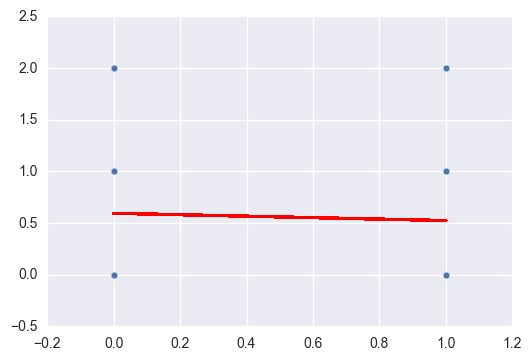

In [94]:
# plot the predicted probabilities
plt.scatter(diabetes3.diabetesMed, diabetes3.readmitted)
plt.plot(diabetes3.diabetesMed, y_pred_prob, color='red')

In [96]:
# examine some example predictions
print logreg.predict_proba(1)

[[ 0.52296952  0.3615699   0.11546058]]


In [97]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9, 0.99]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000
7,0.99,99.000000


In [98]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

In [99]:
np.log(np.exp(5))

5.0

In [100]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225
7,0.99,99.000000,4.595120


## Interpreting Logistic regression coefficients

In [101]:
# compute predicted log-odds for diabetesMed =0 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 0
logodds

array([[ 0.37962029, -0.80175115, -2.23596434],
       [ 0.37962029, -0.80175115, -2.23596434],
       [ 0.37962029, -0.80175115, -2.23596434]])

In [102]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 1.46172945,  0.44854281,  0.106889  ],
       [ 1.46172945,  0.44854281,  0.106889  ],
       [ 1.46172945,  0.44854281,  0.106889  ]])

In [103]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.59378152,  0.30965106,  0.09656705],
       [ 0.59378152,  0.30965106,  0.09656705],
       [ 0.59378152,  0.30965106,  0.09656705]])

In [104]:
# examine the coefficient for 'diabetesMed'
zip(feature_cols, logreg.coef_[0])

[('diabetesMed', -0.28767748741821181)]

### Interpretation: 

*A 1 unit increase in 'diabetesMed' is associated with a 0.28767 unit decrease in the log-odds of 'y_pred_class'.(i.e. 'readmitted' class)

* negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [105]:
# increasing diabetesMed by 1 (so that diabetesMed=1) decrease the log-odds by 0.299
logodds =  	0.111111 -0.28767748741821181
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.45597270067000101

In [108]:
# compute predicted probability for diabetesMed=1 using the predict_proba method. (i.e. takes diabetes medication)
logreg.predict_proba(1)[:, 1]

array([ 0.3615699])

In [106]:
# compute predicted probability for diabetesMed=0 using the predict_proba method. (Patient does not take diabetes medication)
logreg.predict_proba(0)[:, 0]

array([ 0.59378174])

In [107]:
# examine the intercept
logreg.intercept_

array([ 0.37962029, -0.80175115, -2.23596434])

### Interpretation of intercept
For an 'diabetesMed' value of 0, the log-odds of 'y_pred_class'(i.e. no readmission)is 0.37962029, -0.80175115, -2.23596434

In [108]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.59378152,  0.30965106,  0.09656705])

In [109]:
# Confusion Matrix - Logistic regression

from sklearn import metrics
prds = logreg.predict(X)
print metrics.confusion_matrix(y, prds)

[[54864     0     0]
 [35545     0     0]
 [11357     0     0]]


### Interpretation of the Confusion Matrix  - 'diabetesMed'

* The confusion matrix did not produce any robust results.

For the number of hospital readmissions or 'readmitted',the three admission class predictions were 0 and hence the accuracy of the model:

 #### 0.538597594529 or 53.85%
 indicated that the probability of patients being readmitted to hospital  53.85% of the time did not have diabetes and hence (1-prob)= 46.15% of admissions, patient have diabetes or take diabetes medication.



# 3 Evaluation of Models - how can we make a model that generalizes well?

#### Test Set Approach:
1. Split dataset
2. Train model e.g. 80/20 or 70/30
3. Test model
4. Parameter tuning
5. Choose best model
6. Train on all data
7. Make predictions on new data
8. Test set error: different train/test splits will give us different test set errors
9. Cross validation (K-fold cross-validation) take average of the train/test splits -> calc. test set error

#### Bias-Variance tradeoff

In [110]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(color_codes=True)

In [111]:
# Step 1: read the data from diabetic_data.csv into a DataFrame
import pandas as pd
# read transformed and cleaned dataset
diabetes3

# Step 2: define diabetesMed/number_diagnoses as the features and readmitted as the response
feature_cols = ['diabetesMed', 'number_diagnoses']
X = diabetes3[feature_cols]
y = diabetes3.readmitted

# Step 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 4: fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# Step 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.538361764012


In [112]:
# compute null accuracy manually. Predict most frequent class

print y_test.mean()
print 1 - y_test.mean()

0.574483138118
0.425516861882


In [113]:
# equivalent function in scikit-learn
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print metrics.accuracy_score(y_test, y_dumb_class)

0.538597594529


### include 'age' as an extra feature 

In [114]:
feature_cols = ['diabetesMed', 'number_diagnoses', 'age']
X = diabetes3[feature_cols]

# 1. : split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 2. : fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

# 3. : make predictions on testing set and calculate accuracy
y_pred_class = y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.538361764012


### Confusion matrix

In [115]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[13692,    11,     0],
       [ 8857,     5,     0],
       [ 2871,     6,     0]])

In [116]:
#%load confusion_matrix_nice.py
#from confusion_matrix_nice import plot_confusion_matrix
#%run confusion_matrix_nice

In [120]:
# plot an attractive confusion matrix
#cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, diabetes3.readmitted

#plt.figure()
#plot_confusion_matrix(cnf_mat, diabetes3.readmitted,
                                      #normalize=False,
                              #title='Confusion matrix',
                              #cmap=plt.cm.Blues)
#plt.show()

In [121]:
# calculate the sensitivity


In [229]:
# calculate the specificity

In [117]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

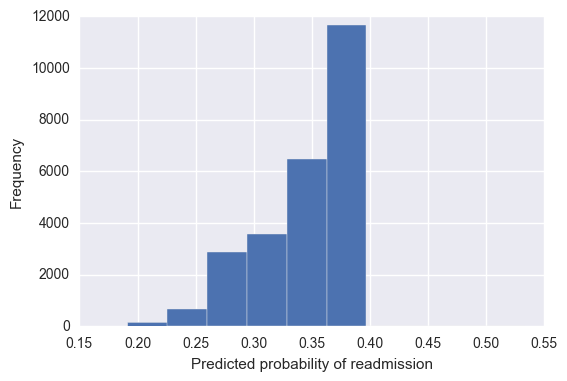

In [118]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of readmission')
plt.ylabel('Frequency')

In [119]:
# change the threshold for predicting survived to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [120]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), 0.25).T

In [121]:
# new confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[  546 13157     0]
 [  182  8680     0]
 [   60  2817     0]]


In [122]:
# new sensitivity (True positive rate or Recall) = TP/Actual 'yes'
2817/ float(2817+60)

0.9791449426485923

In [123]:
# new specificity

182/float(182+8680)

0.020537124802527645

# K-fold Cross Validation - on Classification problems

* Cross-validation: data is a resampling method to estimate test error for statistical learning method to evaluate performance and select level of flexibility
* The test error is the average error that results from the  statistical learning  method to predict the response ('target') on a new observation that was not used in the training method.

* Cross-validation is more accurate  estimte of prediction error
* Used for:
####  a) Model Selection,
####  b) Parameter tuning

* Data is randomly divided from the availble set of observations:
1. Training set
2. Validation set (i.e. Hold-out set or OOS)

### Evaluate the model using 10-fold cross-validation

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Starting with 50 predictors and 20 samples, find 100 predictors
# 1. evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print scores
print scores.mean()

[ 0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349  0.53876349
  0.53876349  0.53876349  0.53876349  0.53929273  0.53929273  0.53929273
  0.53929273  0.53929273  0.53929273  0.53929273  0.53929273  0.53929273
  0.53929273  0.53929273  0.53929273  0.53982301  0.53982301  0.53982301
  0.53982301  0.53982301  0.53982301  0.53982301  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008  0.53937008
  0.53937008  0.53937008  0.53937008  0.53937008  0

### Test error or average error is 0.538962058482 produced from the scores.mean

For K= 10:
*K = 1 the first fold is the validation set (hold out set) and K_fold cross validation was fit on the remaining K-1 folds

* The scoring accuracy  produced a test error that approximates the logistic regression model accuracy due to 'bias-variance trade-off'

### Advantage: 
*  K-fold cross-validation gives a more accurate estimate of the test error than LOOCV (Leave One-Out Cross_Validation) due to **bias-variance trade-off

In [125]:
# 2. We apply a classifier such as logistic regression using only 100 predictors

#Evaluate the Cross-Validation score with different values of n :

# Starting with 5 predictors and 5 samples, find 25 predictors
# 1. evaluate the model using 5-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=25)
print scores
print scores.mean()

[ 0.53904715  0.53904715  0.53904715  0.53904715  0.53904715  0.53904715
  0.53904715  0.53917956  0.53917956  0.53917956  0.53917956  0.53917956
  0.53917956  0.53917956  0.53906634  0.53906634  0.53906634  0.53906634
  0.53906634  0.53906634  0.53919882  0.53919882  0.53919882  0.53919882
  0.53551241]
0.538971708999


#  4 Principal Component Analysis (PCA)
* PCA was not conducted because the variables in the diabetes dataset were not all continuous but included categorical and binary predictors.

# 5 Feature Selection - Regularization

* Bias-Variance trade-off
   * Bias (underfitting)
   *Variance(overfitting)
1. Subset Selection - to reduce computation time of large number of features
   * choose subset of features to include in model and use cross-validation to evaluate model.
2. Shrinkage (regularization): a tuning parameter penalizes the size of coefficients and shrinks them towards zero.
  a) Ridge regression like OLS but includes a penalty term and the **coefficients approach zero
  **b) Lasso regression is like  Ridge regression but you take the **absolute value of beta in the penalty term.
  **c) Elastic Net : Ridge + Lasso
3. Dimension Reduction

### Lasso regularization
The diabetes dataset orignally had 50 variables in various formats and I believe many of the features were irrelvant and were dropped or removed during the transformation stage of the data. 
After cleaning and transforming the diabetes3 dataset, there remains 13 variables. Hence we will use Lasso since it adopts a process where  a feature has a zero coefficient will be removed.

In [126]:
## TASK: Regularized regression
## FUNCTIONS: Ridge, RidgeCV, Lasso, LassoCV


#1.Prepare data 
# read in data, remove categorical features, remove rows with missing values
import pandas as pd

# define X and y
X = diabetes3.iloc[:, :-1]
y = diabetes3.iloc[:, -1]

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [127]:
# How many columns are in X?
X.shape
len(X.columns)

12

In [128]:
#2.Linear Regression Model Without Regularization ##########
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.coef_
# What are these numbers?
len(lm.coef_)

12

In [129]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print 'RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (no regularization) = 0.0


In [130]:
##2. Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print 'RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))


RMSE (Ridge reg.) = 0.0


In [131]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range, cv= 5)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
print 'RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
# What is the range of alpha values we are searching over?

# we are using regularisation with cross validation with cv

##

alpha_range
rregcv.alpha_

RMSE (Ridge CV reg.) = 0.0


0.01

In [132]:
#3. Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

RMSE (Lasso reg.) = 0.0


In [133]:
# try a smaller alpha
las = Lasso(alpha=0.0001, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print 'RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))

# removes features that have coefficients of zero

RMSE (Lasso reg.) = 0.0


In [134]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
alpha_range = 0.01**np.arange(-2,3)
lascv = LassoCV(normalize=True, alphas=alpha_range,cv=5)
lascv.fit(X_train, y_train)
lascv.alpha_
lascv.coef_
preds = lascv.predict(X_test)
print 'RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
lascv.alpha_
lascv.coef_

RMSE (Lasso CV reg.) = 0.0


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# 6 Clustering - K-means clustering 
(to find patterns in unstructured data)

In [136]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn import cluster, datasets

In [137]:
# Read the Diabetic dataset

# Read diabetic_data.csv into a Dataframe called 'diabetes'
diabetes = pd.read_table('diabetic_data.csv', sep=',')
diabetes = pd.read_csv('diabetic_data.csv')

In [138]:
# Load and import dataset
diabetes = datasets.load_diabetes()
d = diabetes.data
np.random.seed(0)

AttributeError: feature_names

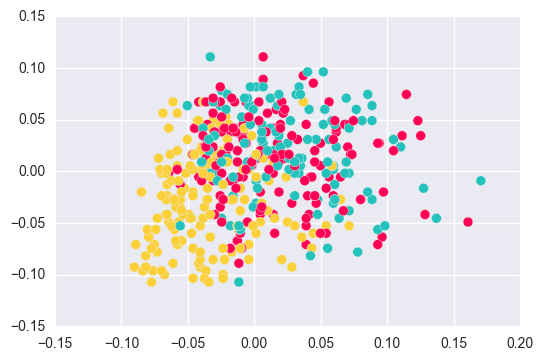

In [139]:
# Run KMeans using  3 clusters 
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel(diabetes.feature_names[0])

AttributeError: feature_names

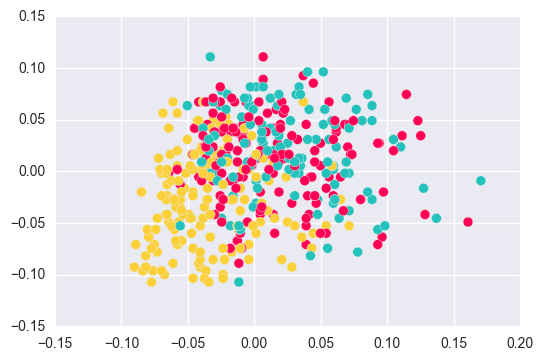

In [140]:
# ------------------------------------------
# Find the centers and plot them 
#     on the same graph.
# ------------------------------------------

centers = est.cluster_centers_
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel(diabetes.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

AttributeError: diabetesMed

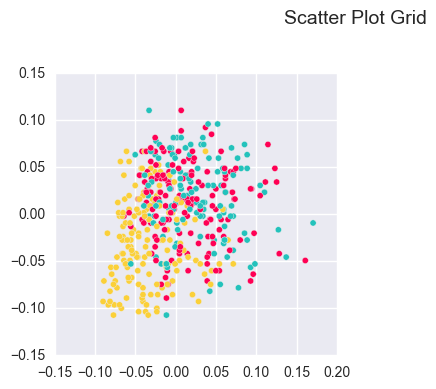

In [141]:
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(diabetes.diabetesMed[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(diabetes.readmitted[1])
plt.xlabel(diabetes.age[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(diabetes.diabetesMed[3])

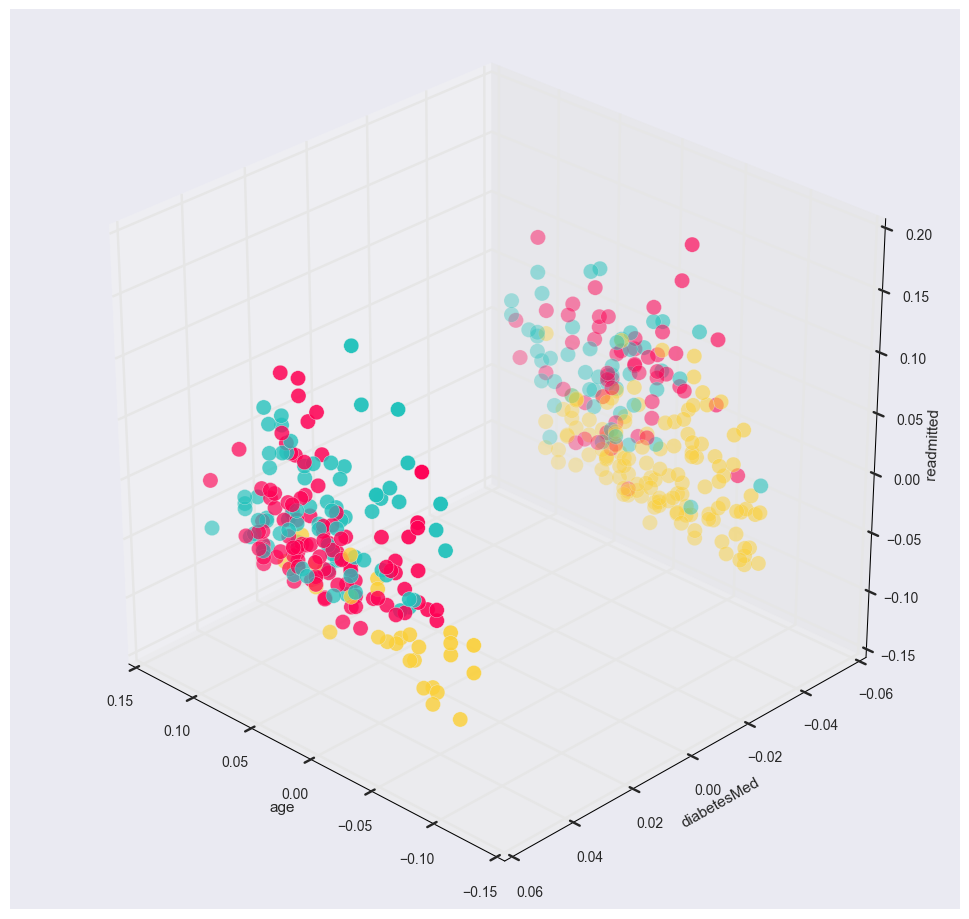

In [142]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('age')
ax.set_ylabel('diabetesMed')
ax.set_zlabel('readmitted')

In [143]:
from pandas.tools.plotting import parallel_coordinates

features = [name[:-5].title().replace(' ', '') for name in diabetes.feature_names]
diabetes = pd.DataFrame(diabetes.data, columns = features)
diabetes['Name'] = diabetes.target_names[diabetes.target]
parallel_coordinates(frame=diabetes, class_column='Name', 
                     color=('#FF0054', '#FBD039', '#23C2BC'))

AttributeError: feature_names

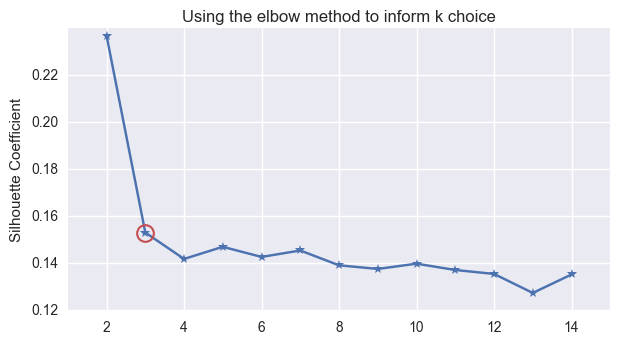

In [144]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


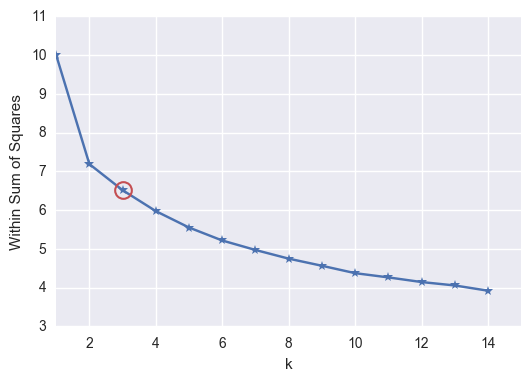

In [145]:
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

within_sum_squares

# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [146]:
# perform clustering with 4 clusters
diabetes_cluster = KMeans(n_clusters=4, init='random')
diabetes_cluster.fit(df.drop('name', axis=1))
y_kmeans = diabetes_cluster.predict(df.drop('name', axis=1))

NameError: name 'df' is not defined

In [147]:

# get info on one cluster
for cluster_in_question in range(0,4):
    # get center of cluster
    "centroid", diabetes_cluster.cluster_centers_[cluster_in_question]
    # grab diabetes in dataframe that belong to this cluster
    diabetes = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print sorted(zip(df.columns[1:], diabetes_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6]
    print
 
from sklearn import metrics
metrics.silhouette_score(df.drop('name',axis=1), diabetes_cluster.labels_, metric='euclidean')   

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [148]:
# perform k means with up to 15 clusters
# similar to grid search, just using a list
# comprehension
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(df.drop('name',axis=1)) for k in k_rng]

# What do these clusters look like?



est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(diabetes.feature_names[2])
plt.ylabel(diabetes.feature_names[0])

for cluster_in_question in range(0,15):
    # get center of cluster
    #"centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    diabetes = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6]
    print
 
from sklearn import metrics
metrics.silhouette_score(df.drop('name',axis=1), diabetes_cluster.labels_, metric='euclidean')   



NameError: name 'df' is not defined

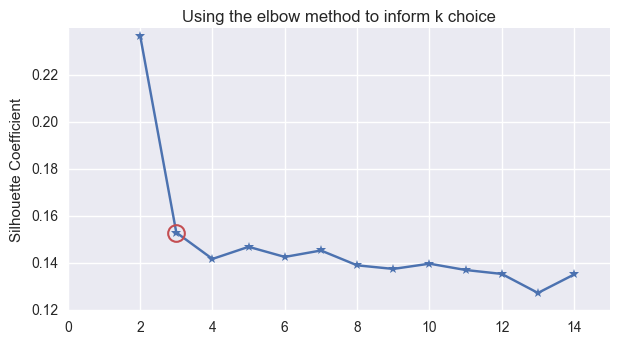

In [149]:
# Write code to plot the clusters

# Wendy's coding
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([0,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

### Cluster validation

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


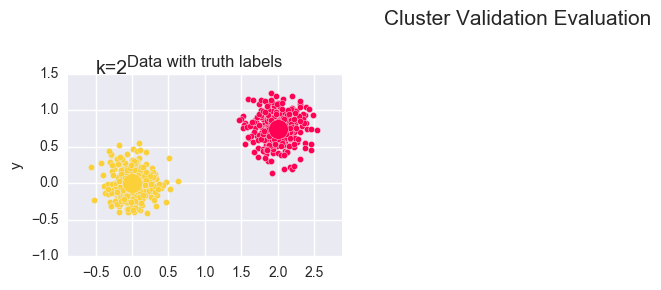

In [150]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

'''
K = 2
'''

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1))
labels_true = np.concatenate((labels0_true,labels1_true+1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.5, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')


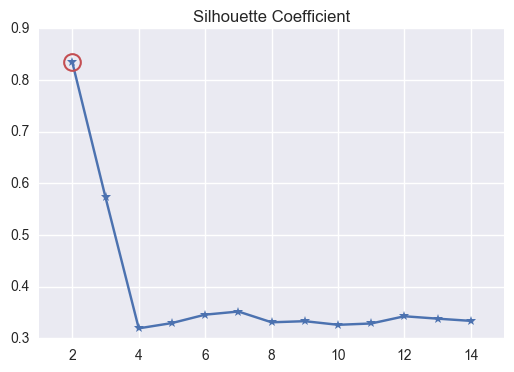

In [151]:
# Calculate Silhouette Scores for k = 2
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resh

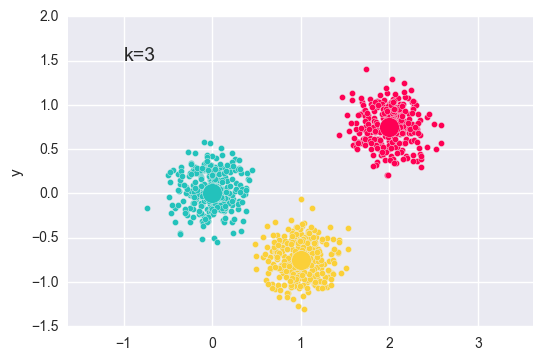

In [152]:
'''
K = 3
'''

# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.5, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

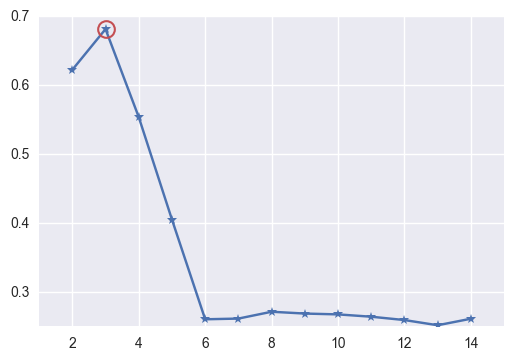

In [153]:

# Calculate Silhouette Scores for k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

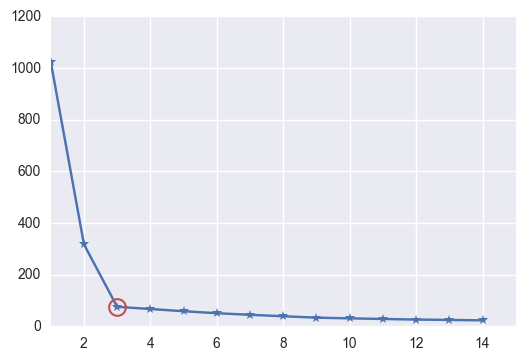

In [154]:
# Calculate the within sum of squared errors for k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resh

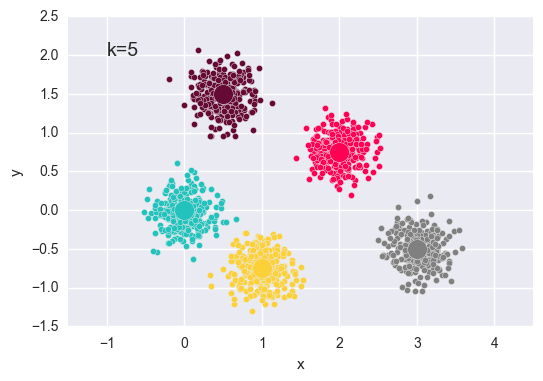

In [155]:
# Generate and Plot Dummy Data for k = 5
centres = [[2, 0.75], [1, -0.75], [0, 0], [0.5, 1.5], [3, -0.5]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X3, labels3_true = make_blobs(n_samples=300, centers=centres[3], cluster_std=[[0.2,0.2]])
X4, labels4_true = make_blobs(n_samples=300, centers=centres[4], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2,X3,X4))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2,
                              labels3_true+3,labels4_true+4))
colors = np.array(['#FF0054','#FBD039','#23C2BC', '#650A34', '#808080'])
plt.text(-1, 2, 'k=5', fontsize=14)
for k, col in zip(range(5), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

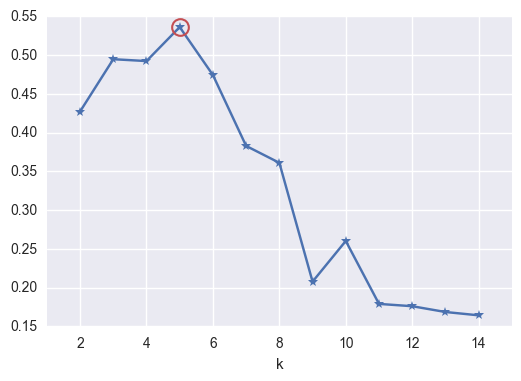

In [156]:
# Calculate Silhouette Scores for k = 5
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,silhouette_score[3], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/wendywong/Documents/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resh

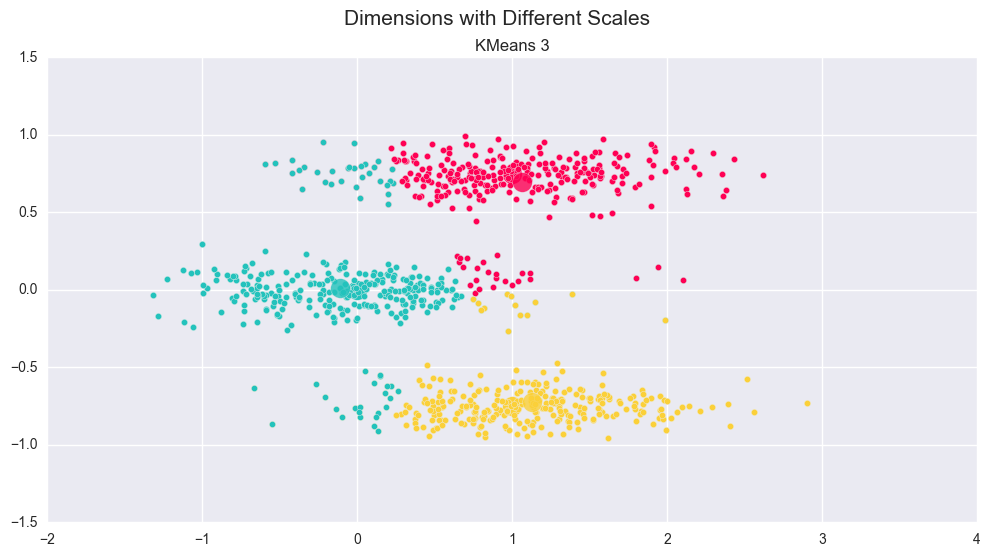

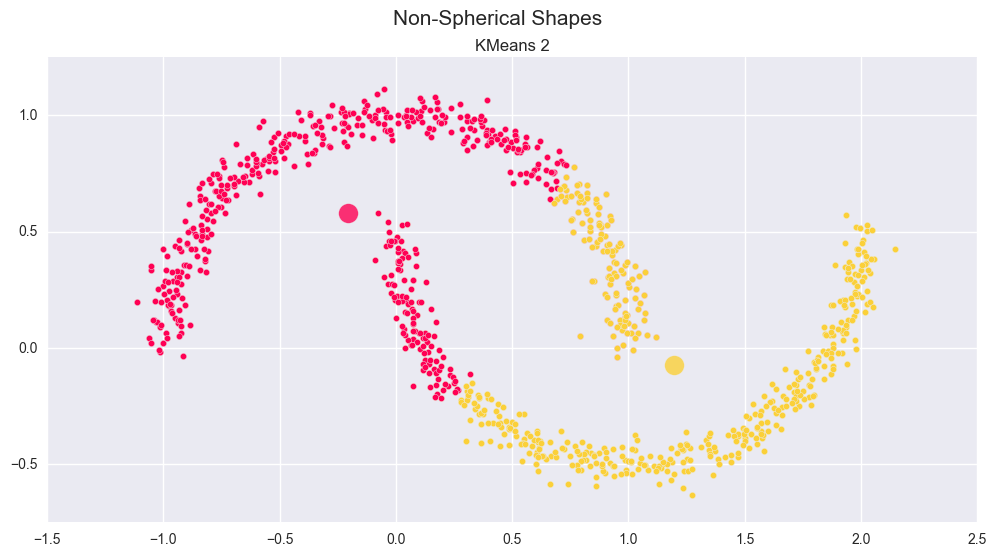

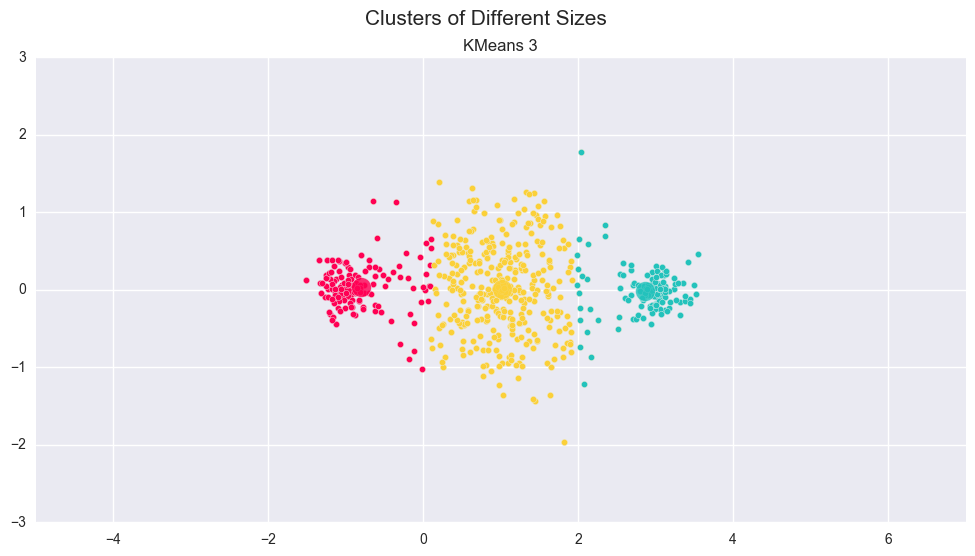

In [157]:
'''
NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes
'''

from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

'''
1) DIMENSIONS WITH DIFFERENT SCALES
'''

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

'''
#2: NON-SPHERICAL SHAPES
'''

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

'''
#3: CLUSTERS OF DIFFERENT SIZES
'''

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

#### To Do

*I am  work on debugging some of the coding for parallel  coordinates and also  cluster
* I am to also run an algorithm using Decision trees, random forest, ensemble and also time series